<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/mlprii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama : Derfansyah Guswiranata Kurnia
- Identitas Dicoding : dgkurnia
- Domisili : Jakarta Timur
- email dicoding : weerakurnia@gmail.com

In [1]:
#Tahap Awal Inisiasi perpustakaan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#model linear
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
#Bagian Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#eksekusi file
from google.colab import drive
drive.mount('/content/gdrive')
#lanjutan perpustakaan
import time

Mounted at /content/gdrive


In [2]:
#Inspeksi tensorflow
!pip install tensorflow==2.15
!pip install keras==2.15
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping as es

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
#unduh file
!wget -O janken.zip https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!ls

In [4]:
#Bagian impor os
import os
import zipfile #aktivasi file '.zip'
desain = 'janken.zip'
zip_ref = zipfile.ZipFile(desain, 'r')
zip_ref.extractall()
zip_ref.close()

**Fasa1 : persiapan file**

In [6]:
#fasa awal (inisiasi)
import os
kertascol = '/content/rockpaperscissors/paper'
batucol = '/content/rockpaperscissors/rock'
guntingcol = '/content/rockpaperscissors/scissors'

#deklarasi variable os deklarasi daftar
listdirkert = os.listdir(kertascol) #kertas
listdirbatu = os.listdir(batucol) #batu
listdirgunting = os.listdir(guntingcol) #gunting

# persiapan data
print("total data gunting", len(listdirkert))
print("total data kertas", len(listdirbatu))
print("total data batu", len(listdirgunting))


total data gunting 712
total data kertas 726
total data batu 750


**Fasa 2: Inspeksi **

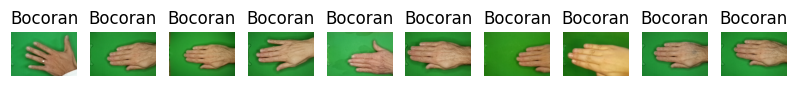

In [7]:
#Cek bocoran (Identifikasi gambar tahap awal)
baris = 10
kolom = 10
#pembuatan file file gambar kertas untuk lima jenis file gambar berbeda
filegmb = [a for a in listdirkert if a.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
#intip 10 gambar pertama (ilustrasi grafik)
plt.figure(figsize=(10, 10))
#iterasi 10 gambar pertama (variable bocoran)
bocoran = enumerate(filegmb[:10])
#iterasi sesunguhnya
for a, filegmb in bocoran :
  jlrgmb = os.path.join(kertascol, filegmb)
  gmb = mpimg.imread(jlrgmb) #Untuk inspeksi gambar
  #Bagian sub grafik
  plt.subplot(baris, kolom, a+1)
  plt.imshow(gmb)
  plt.title('Bocoran')
  plt.axis('off')#mema
  #penampilan bocoran
plt.show()

**Fasa 3 : persiapan Tensor**

In [8]:
# Inisiasi perpustakaan
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.optimizers import RMSprop as rmsp
from tensorflow.keras.optimizers import Adam as adam
# Persiapan jalur asli untuk inspeksi folder
colasli = '/content/rockpaperscissors/rps-cv-images'

# Eksekusi ImageDataGenerator dengan normalisasi yang disederhanakan
img_latihan = idg(
    rescale=1./255,  # Normalisasi pixel ke rentang [0, 1]
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.4  # Nilai validasi adalah 40 persen
)
img_validasi = idg(
    rescale=1./255,  # Normalisasi pixel ke rentang [0, 1]
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.4  # Nilai validasi adalah 40 persen
)

# Fit generator untuk menghitung statistik normalisasi (Pastikan untuk menggunakan subset 'training' agar statistik dihitung dari data pelatihan saja)

In [9]:
# Modifikasi sesi latihan dengan generator yang telah dinormalisasi
seksi_latihan = img_latihan.flow_from_directory(
    colasli,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True, seed=42
)

# Modifikasi sesi validasi dengan generator yang sama untuk konsistensi normalisasi
seksi_validasi = img_validasi.flow_from_directory(
    colasli,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True, seed=42
)

# Lanjut ke tahap konstruksi materi eksekusi

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Fasa 4: validasi keras**

In [ ]:
#validasi
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf
#Penetapan ukuran
lbr_gmb = 150
tgi_gmb = 150 #Lebar dan tinggi
#persiapan model keras
kerasmod = tf.keras.models.Sequential([
    # Lapisan 32
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='leaky_relu', padding='valid',
    input_shape=(lbr_gmb, tgi_gmb, 3)), tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Lapisan 64
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='leaky_relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Lapisan 128
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='leaky_relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Lapisan 256
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='leaky_relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Lapisan 512
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='leaky_relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Perataan
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dropout for regularization
    tf.keras.layers.Dropout(0.5),

    # Aktivasi protokol
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(256, activation='leaky_relu'),
    tf.keras.layers.Dense(512, activation='leaky_relu'),

    # Output layer for classification (assuming three classes)
    tf.keras.layers.Dense(3, activation='softmax')
])
#Ringkasan
kerasmod.summary()
#Ke fasa 5

**Fasa 5 Kompilasi**
- Fasa 5-a: persiapan laju bagian optimasi

In [11]:
#Persiapan laju penyesuaian (Deklarasi laju)
jadwal = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=15000, decay_rate=0.95,
    staircase=True
)
#Deklarasi optimasi
jadopti = tf.keras.optimizers.Adam(learning_rate=jadwal, beta_1=0.985, beta_2=0.985) #Jadwal optimasi
#Pemanggilan kembali tensor
pangiltensor = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
escallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 8, restore_best_weights=True) #kesabaran inspeksi
mccallback = tf.keras.callbacks.ModelCheckpoint(filepath='model_best.keras', monitor='val_accuracy', save_best_only=True) #model checkpoint callback


- Fasa 5-b: kompilasi sesungguhnya

In [13]:
#Perpustakaan kompilasi
from keras.losses import CategoricalFocalCrossentropy as catfoscent
from keras.metrics import Precision, Recall
# Eksekusi Kompilasi dan penyesuaian (kelas untuk kompilasi).
class DynamicFocalLoss(catfoscent):
    def __init__(self, alpha=0.5, gamma=2.5, **kwargs):
        super().__init__(alpha=alpha, gamma=gamma, **kwargs)
        self.alpha = alpha
        self.gamma = gamma

    def update_params(self, alpha, gamma):
        self.alpha = alpha
        self.gamma = gamma


**Eksekusi metrik dinamis**

In [14]:
#Dinamisasi metrik
class DynamicPrecision(Precision):
    def update_params(self):
        # Penambahan fungsi
        pass

class DynamicRecall(Recall):
    def update_params(self):
        # Penambahan fungsi
        pass

In [15]:
#Kompilasi sessungguhnya (Insiasi metrik loss dinamik)
dynamic_loss = DynamicFocalLoss(alpha=0.5, gamma=2.5)
dynamic_precision = DynamicPrecision()
dynamic_recall = DynamicRecall()
#Ke fasa 6

**Fasa 6 : persiapan epok**

In [16]:
#Kelas 'Dataset Kustom'
num_classes = 3  # Janken terdiri dari kertas, batu, gunting
# Kelas 'Dataset Kustom' dan Dinamisasi epoch
class CustomDataset(tf.data.Dataset):
    def __init__(self, data_gen, batch_size=30):
        super().__init__()
        self.data_gen = data_gen
        self.batch_size = batch_size
        self.dataset = None  # Diinisiasikan ke awal

    def _as_variant_tensor(self):
        return self.dataset._variant_tensor

    @property
    def element_spec(self):
        return (tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32))

    def preprocess(self):
        self.dataset = tf.data.Dataset.from_generator(
            lambda: self.data_gen(),
            output_signature=(tf.TensorSpec(shape=(150, 150, 3), dtype=tf.float32),
                              tf.TensorSpec(shape=(num_classes,), dtype=tf.float32))
        )

        return (self.dataset
                .map(self._preprocess_function)
                .shuffle(buffer_size=1000)
                .batch(self.batch_size)
                .repeat())  # Pengulangan setiap batch

    def _preprocess_function(self, image, label):
        image = tf.image.resize(image, [256, 256]) / 255.0
        return image, label


In [17]:
#Dinamisasi parameter
EPOK = 20  # Number of epochs
batch_size = 30  # Definisi Epok

# Dinamisasi Epok
steps_per_epoch = len(seksi_latihan) // batch_size
validation_steps = len(seksi_validasi) // batch_size

# Callback for dynamic epoch adjustment based on AUC
class DynamicEpochs(tf.keras.callbacks.Callback):
    def __init__(self, patience=5):
        super().__init__()
        self.patience = patience
        self.best_auc = 0
        self.wait = 0
#fungsi di nilai AUC
    def on_epoch_end(self, epoch, logs=None):
        current_auc = logs.get('val_auc')
        if current_auc is not None:
            if current_auc > self.best_auc:
                self.best_auc = current_auc
                self.wait = 0
            else:
                self.wait += 1
            if self.wait >= self.patience:
                print(f"Early stopping at epoch {epoch + 1} due to no improvement in AUC.")
                self.model.stop_training = True
  # Inisiasi 'callback'
dynamic_epochs_callback = DynamicEpochs(patience=5)


In [18]:
#Eksekusi dan pengamatan (Kompilasi)
kerasmod.compile(
    loss=dynamic_loss,
    optimizer='adam',
    metrics=['accuracy', dynamic_precision, dynamic_recall, 'AUC'],
    run_eagerly=True
)

In [ ]:
#Eksekusi dan pengamatan
almanak = kerasmod.fit(
    seksi_latihan,  # Hal ini mewakili seksi latihan
    epochs=EPOK, #Nilai di atas
    batch_size=batch_size,
    validation_data = seksi_validasi,  # Changed to keyword argument
    callbacks=[pangiltensor, escallback, mccallback, dynamic_epochs_callback],
    verbose=5
)
#hasil (Inspeksi akurasi selama epok) di bawah
epokinsp = {'nilai akurasi': almanak.history['accuracy'],'nilai val_akurasi ': almanak.history['val_accuracy'],
    'lenyap ': almanak.history['loss'],'nilai val_lenyap': almanak.history['val_loss']}
#Nilai Epok
print(epokinsp)

**Inspeksi Tabel dan Grafik**

In [20]:
#Inspeksi tabel
if 'val_loss' in almanak.history:  # Inspeksi nilai hilang selama inspeksi
    # Evaluasi model almanak di latohan dan validasi
    akurasi = np.round(kerasmod.evaluate(seksi_latihan),3)  # Hasil Akurasi
    hilang = np.round(kerasmod.evaluate(seksi_validasi),3)  # Hasil hilang
    # Mencetak hasil
    print("Total hilang:", hilang, "Total akurasi:", akurasi)
else:
    print("Tak perlu validasi :)")
#Hasil di bawah

28/28 [==============================] - 28s 995ms/step - loss: 0.0598 - accuracy: 0.8753 - dynamic_precision: 0.8950 - dynamic_recall: 0.8387 - auc: 0.9736
Total hilang: [0.06  0.875 0.895 0.839 0.974] Total akurasi: [0.056 0.88  0.908 0.859 0.977]


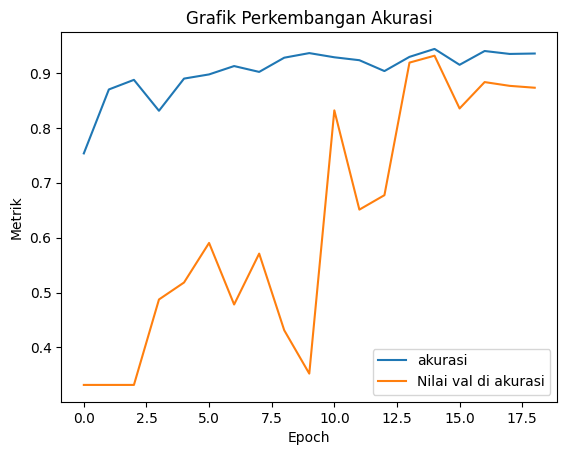

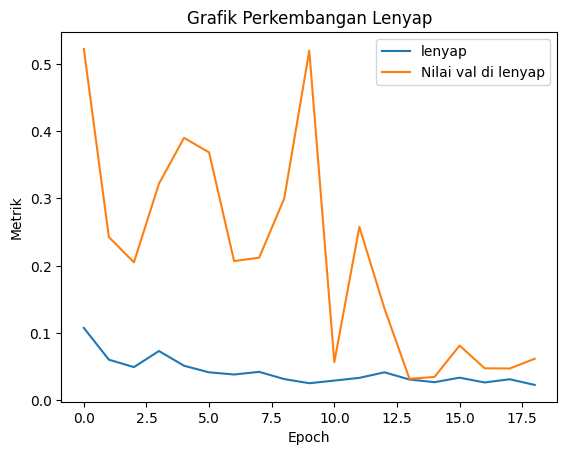

In [21]:
#hasil pemeriksaan akurasi dan lenyap di grafik bawah
plt.plot(almanak.history['accuracy'], label='akurasi')
plt.plot(almanak.history['val_accuracy'], label='Nilai val di akurasi')
plt.title('Grafik Perkembangan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Metrik')
plt.legend()
plt.show()
#Perkembangan lenyap di fasa asli dan validasi
plt.plot(almanak.history['loss'], label='lenyap')
plt.plot(almanak.history['val_loss'], label='Nilai val di lenyap')
plt.title('Grafik Perkembangan Lenyap')
plt.xlabel('Epoch')
plt.ylabel('Metrik')
plt.legend()
plt.show()

**Fasa 6a : Inspeksi Hasil Epok**

**Fasa 7a : persiapan eksekusi**

In [22]:
#Kode untuk penyimpnan model
kerasmod.save('danxhmodelv1,3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


- Fasa 7b: Eksekusi model

Saving 0OEXfEooCXlljaEl.png to 0OEXfEooCXlljaEl.png
1/1 [==============================] - 0s 60ms/step
0OEXfEooCXlljaEl.png
0OEXfEooCXlljaEl.png
Rock


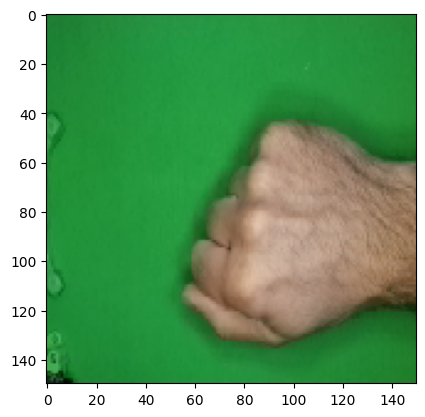

In [25]:
#Eksekusi tambahan
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = kerasmod.predict(images, batch_size=10)
  print(fn)

  print(fn)
  if classes[0][0] == 1:
    print('Paper')
  elif classes[0][1] == 1:
    print('Rock')
  else:
    print('Scissor')
